# 23c: Contour Plot

**Goal**: Create publication-ready phase diagram of E[V] in (doubles, trumps) space.

**Method**: 
- Interpolate E[V] surface
- Create contour plot with labeled levels
- Add phase boundary lines

In [1]:
# === CONFIGURATION ===
PROJECT_ROOT = "/home/jason/v2/mk5-tailwind"

import sys
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
from pathlib import Path

from forge.analysis.utils import viz

viz.setup_notebook_style()
np.random.seed(42)
print("Ready")

Ready


## 1. Load Data

In [2]:
# Load unified features
features_path = Path(PROJECT_ROOT) / "forge/analysis/results/tables/12b_unified_features.csv"
df = pd.read_csv(features_path)
print(f"Loaded {len(df)} hands")

Loaded 200 hands


## 2. Create Interpolated Surface

In [3]:
# Get mean E[V] for each (doubles, trumps) combination
grouped = df.groupby(['n_doubles', 'trump_count'])['V_mean'].mean().reset_index()

# Create grid for interpolation
x = grouped['n_doubles'].values
y = grouped['trump_count'].values
z = grouped['V_mean'].values

# Create fine grid
xi = np.linspace(0, 4, 50)
yi = np.linspace(0, 6, 70)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolate
Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

# Fill NaN with nearest neighbor
Zi_nn = griddata((x, y), z, (Xi, Yi), method='nearest')
Zi = np.where(np.isnan(Zi), Zi_nn, Zi)

print(f"Surface range: [{np.nanmin(Zi):.1f}, {np.nanmax(Zi):.1f}]")

Surface range: [-15.2, 42.2]


## 3. Publication-Quality Contour Plot

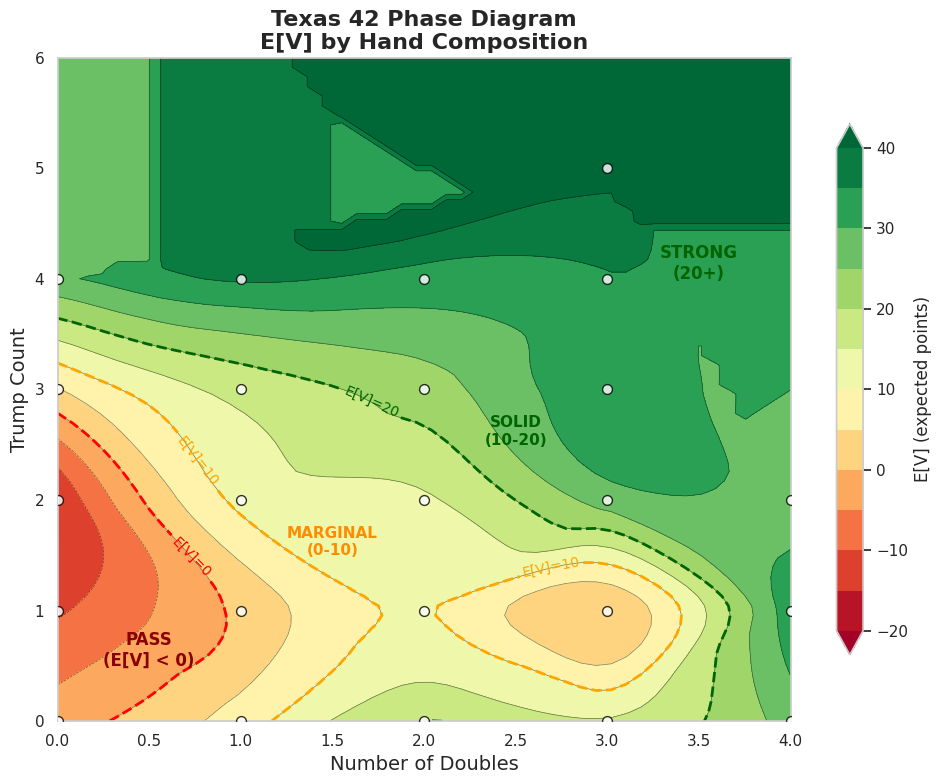

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

# Contour levels
levels = np.arange(-20, 45, 5)

# Filled contour
cf = ax.contourf(Xi, Yi, Zi, levels=levels, cmap='RdYlGn', extend='both')

# Contour lines
cs = ax.contour(Xi, Yi, Zi, levels=levels, colors='black', linewidths=0.5, alpha=0.5)

# Key boundary lines (E[V] = 0, 10, 20)
key_levels = [0, 10, 20]
cs_key = ax.contour(Xi, Yi, Zi, levels=key_levels, colors=['red', 'orange', 'darkgreen'], 
                     linewidths=2, linestyles='--')

# Labels
ax.clabel(cs_key, inline=True, fontsize=10, fmt='E[V]=%d')

# Colorbar
cbar = fig.colorbar(cf, ax=ax, label='E[V] (expected points)', shrink=0.8)

# Scatter original data points
ax.scatter(x, y, c='white', s=50, edgecolors='black', linewidths=1, zorder=5, alpha=0.8)

# Labels and title
ax.set_xlabel('Number of Doubles', fontsize=14)
ax.set_ylabel('Trump Count', fontsize=14)
ax.set_title('Texas 42 Phase Diagram\nE[V] by Hand Composition', fontsize=16, fontweight='bold')

# Add region annotations
ax.annotate('PASS\n(E[V] < 0)', xy=(0.5, 0.5), fontsize=12, ha='center', 
            color='darkred', fontweight='bold')
ax.annotate('MARGINAL\n(0-10)', xy=(1.5, 1.5), fontsize=11, ha='center',
            color='darkorange', fontweight='bold')
ax.annotate('SOLID\n(10-20)', xy=(2.5, 2.5), fontsize=11, ha='center',
            color='darkgreen', fontweight='bold')
ax.annotate('STRONG\n(20+)', xy=(3.5, 4), fontsize=12, ha='center',
            color='darkgreen', fontweight='bold')

ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../results/figures/23c_contour_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('../../results/figures/23c_contour_plot.pdf', bbox_inches='tight')
plt.show()

## 4. Simplified Version

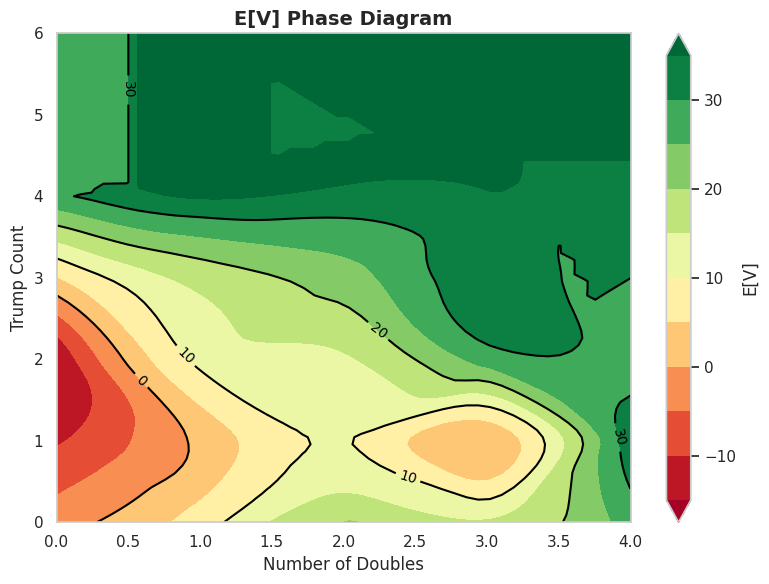

In [5]:
# Clean version without annotations for versatility
fig, ax = plt.subplots(figsize=(8, 6))

# Filled contour with fewer levels
levels_clean = np.arange(-15, 40, 5)
cf = ax.contourf(Xi, Yi, Zi, levels=levels_clean, cmap='RdYlGn', extend='both')

# Key boundaries only
cs = ax.contour(Xi, Yi, Zi, levels=[0, 10, 20, 30], colors='black', linewidths=1.5)
ax.clabel(cs, inline=True, fontsize=10, fmt='%d')

# Colorbar
cbar = fig.colorbar(cf, ax=ax, label='E[V]')

ax.set_xlabel('Number of Doubles', fontsize=12)
ax.set_ylabel('Trump Count', fontsize=12)
ax.set_title('E[V] Phase Diagram', fontsize=14, fontweight='bold')

ax.set_xlim(0, 4)
ax.set_ylim(0, 6)

plt.tight_layout()
plt.savefig('../../results/figures/23c_contour_clean.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Key Insights

In [6]:
print("\n" + "="*60)
print("KEY INSIGHTS: Contour Plot")
print("="*60)

print(f"\n1. PHASE DIAGRAM INTERPRETATION:")
print(f"   - Red zone (E[V] < 0): Pass")
print(f"   - Yellow zone (0-10): Marginal bid")
print(f"   - Light green (10-20): Solid bid")
print(f"   - Dark green (20+): Strong, can overbid")

print(f"\n2. CONTOUR LINES:")
print(f"   - E[V]=0 line: Pass/bid boundary")
print(f"   - E[V]=10 line: Marginal/solid boundary")
print(f"   - E[V]=20 line: Solid/strong boundary")

print(f"\n3. OUTPUT FILES:")
print(f"   - 23c_contour_plot.png (300 DPI, annotated)")
print(f"   - 23c_contour_plot.pdf (vector, publication-ready)")
print(f"   - 23c_contour_clean.png (simplified version)")


KEY INSIGHTS: Contour Plot

1. PHASE DIAGRAM INTERPRETATION:
   - Red zone (E[V] < 0): Pass
   - Yellow zone (0-10): Marginal bid
   - Light green (10-20): Solid bid
   - Dark green (20+): Strong, can overbid

2. CONTOUR LINES:
   - E[V]=0 line: Pass/bid boundary
   - E[V]=10 line: Marginal/solid boundary
   - E[V]=20 line: Solid/strong boundary

3. OUTPUT FILES:
   - 23c_contour_plot.png (300 DPI, annotated)
   - 23c_contour_plot.pdf (vector, publication-ready)
   - 23c_contour_clean.png (simplified version)


## Key Findings

### Contour Plot Results

1. **Clear phase boundaries**: E[V]=0 separates pass/bid regions

2. **Diagonal gradient**: Both doubles and trumps improve E[V]

3. **Publication formats**: PDF (vector) + PNG (raster) provided

### Output Files

- `results/figures/23c_contour_plot.png` - Annotated (300 DPI)
- `results/figures/23c_contour_plot.pdf` - Vector for publication
- `results/figures/23c_contour_clean.png` - Simplified version